In [1]:
import os
os.listdir('/kaggle/input/')

['titanic-survival-prediction']

# **Import necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Read and exlore data**

In [3]:
df=pd.read_csv('/kaggle/input/titanic-survival-prediction/titanic.csv')

# **Data Analysis**

In [4]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Column types**
* Numerical: PassengerId,Age, Fare
* Categorical: Survived, PClass, Sex, SibSp, ParCh,Embarked
* Mixed: Name, Ticket, Cabin

**Conclusions**
1. There are total 891 passengers
2. Age, Embarked and Cabin columns have missing values 

* **Univariate Analysis on each columns**

In [5]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

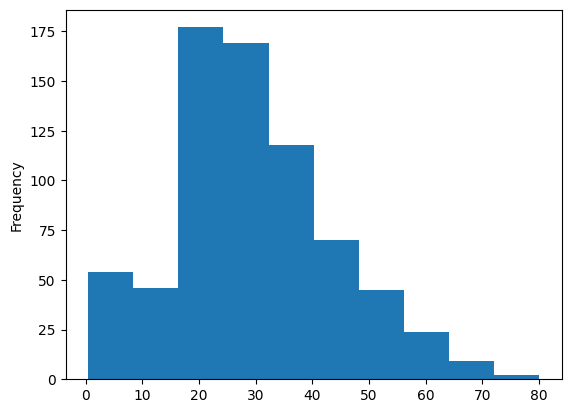

In [6]:
df['Age'].plot(kind='hist')

In [7]:
df['Age'].skew()       #to find skewness

0.38910778230082704

<Axes: >

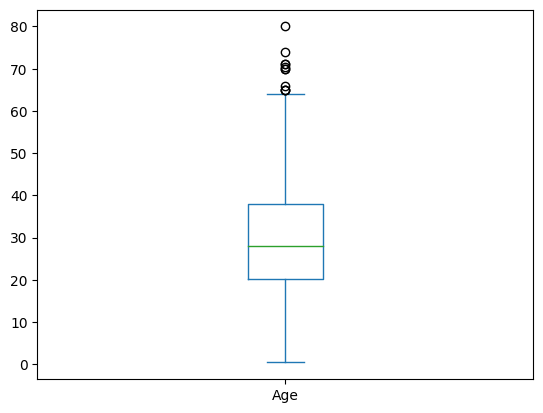

In [8]:
df['Age'].plot(kind='box')  #to draw boxplot

In [9]:
#checking if there is any null value
df['Age'].isnull().sum()

177

In [10]:
df['Age'].isnull().sum()/len(df['Age'])*100

19.865319865319865

**Conclusion**
1. Age is normally distributed(almost)
2. 20% values are missing
3. There are some outliers

In [11]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

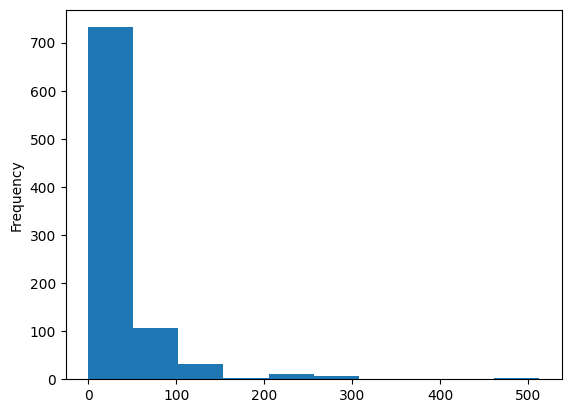

In [12]:
df['Fare'].plot(kind='hist')

In [13]:
df['Fare'].skew()

4.787316519674893

<Axes: >

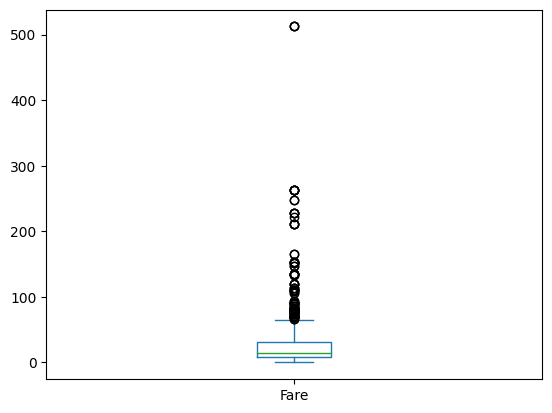

In [14]:
df['Fare'].plot(kind='box')

**Conclusion**
1. Fare is rightly skewed
2. Outliers exists
3. There is no missing value

In [15]:
df['Survived'].value_counts()   #calculate frequency distribution

Survived
0    549
1    342
Name: count, dtype: int64

**Conclusion** 

  342 passengers have survived and 549 passengers have died

In [16]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

**Conclusion:**
There are 491 passengers of class 3, 216 of class 2, 184 of class 1

In [17]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

**Conclusion**
There are 577 male passengers and 314 female passengers

In [18]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [19]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

**Conclusion**
There are some passengers who are travelling alone and some with family. We can count it as a single column 'Family_size' with number of family members

In [20]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: ylabel='count'>

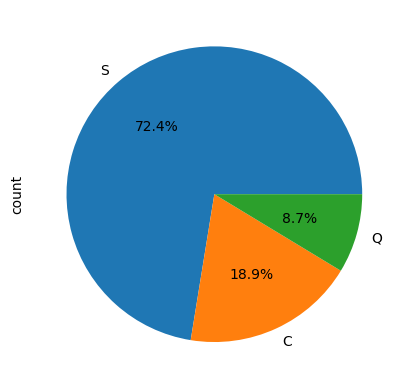

In [21]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

* **Bivariate Analysis**

In [22]:
pd.crosstab(df['Survived'],df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='Pclass', ylabel='Survived'>

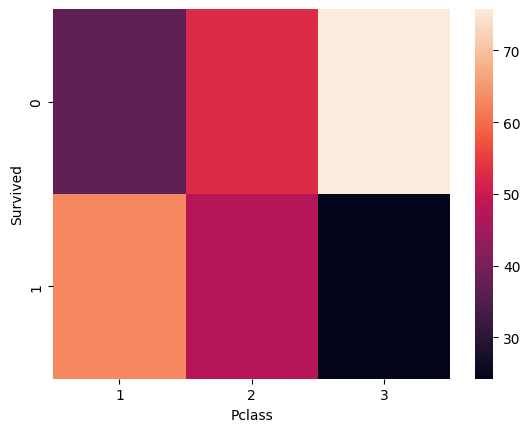

In [23]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

**Conclusion:**
  We can conclude that PClass 1 is safest to travel. Pclass 3 was most dangereous.

In [24]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


**Conclusion:**
  Ladies are treated as first priority as 74% ladies were survived whereas only 18% male were survived

In [25]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


**Conclusion**
Though the number of person survived does not matter from where they boarded but 'C' has highest number of survivals. 

In [26]:
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [27]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


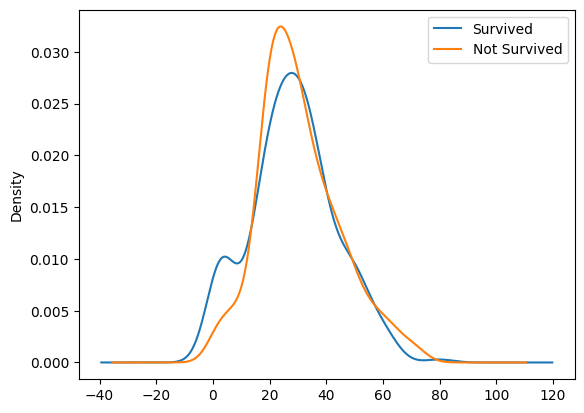

In [28]:
df[df['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

# **Feature Engineering on fare column**

In [29]:
df['SibSp'].value_counts()


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [30]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1

In [31]:
# family_type
# 1 -> alone
# 2-4 -> small
# >5 -> large

def transform_family_size(num):

  if num == 1:
    return 'alone'
  elif num>1 and num <5:
    return "small"
  else:
    return "large"

In [32]:
df['family_type'] = df['family_size'].apply(transform_family_size)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,alone


In [33]:
pd.crosstab(df['Survived'],df['family_type'],normalize='columns')*100

family_type,alone,large,small
Survived,,,
0,69.646182,83.870968,42.123288
1,30.353818,16.129032,57.876712


**Conclusion:**
If you are travelling in a small family you have higher chance to survive

In [34]:
df['surname'] = df['Name'].str.split(',').str.get(0)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_type,surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,small,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,small,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,alone,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,small,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,alone,Allen


In [35]:
df['title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [36]:
temp_df = df[df['title'].isin(['Mr.','Miss.','Mrs.','Master.','ootherr'])]

In [37]:
pd.crosstab(temp_df['Survived'],temp_df['title'],normalize='columns')*100

title,Master.,Miss.,Mr.,Mrs.
Survived,,,,
0,42.5,30.21978,84.332689,20.8
1,57.5,69.78022,15.667311,79.2


**Conclusion:**
If you are Mrs. you have higher chances of survival

In [38]:
df['title'].value_counts()

title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

Which titles are in small number we identify it as other

In [39]:
df['title'] = df['title'].str.replace('Rev.','Other')
df['title'] = df['title'].str.replace('Dr.','Other')
df['title'] = df['title'].str.replace('Col.','Other')
df['title'] = df['title'].str.replace('Major.','Other')
df['title'] = df['title'].str.replace('Capt.','Other')
df['title'] = df['title'].str.replace('the','Other')
df['title'] = df['title'].str.replace('Jonkheer.','Other')
df['title'] = df['title'].str.replace('Mlle.','Other')
df['title'] = df['title'].str.replace('Don.','Other')
df['title'] = df['title'].str.replace('Mme.','Other')
df['title'] = df['title'].str.replace('Ms.','Other')
df['title'] = df['title'].str.replace('Lady.','Other')
df['title'] = df['title'].str.replace('Sir.','Other')
# ,'Dr.','Col.','Major.','Don.','Capt.','the','Jonkheer.']

In [40]:
df['title'].value_counts()

title
Mr.        517
Miss.      182
Mrs.       125
Master.     40
OOtherr     18
Other        9
Name: count, dtype: int64

In [41]:
df['Cabin'].isnull().sum()/len(df['Cabin'])

0.7710437710437711

In [42]:
df['Cabin'].fillna('M',inplace=True)

In [43]:
df['Cabin'].value_counts()

Cabin
M              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [44]:
df['deck'] = df['Cabin'].str[0]

In [45]:
df['deck'].value_counts()

deck
M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [46]:
pd.crosstab(df['deck'],df['Pclass'])

Pclass,1,2,3
deck,,,
A,15,0,0
B,47,0,0
C,59,0,0
D,29,4,0
E,25,4,3
F,0,8,5
G,0,0,4
M,40,168,479
T,1,0,0


**Conclusion:**
Deck A,B,C,T are reserved for Pclass 1, Pclass 1 and 2 both can travel in deck D, Deck E is for all classes, F is designed for Pclass 2 and 3 , G deck is only for Pclass 3 passengers, Deck M is for all classes but mostly pClass 3 travels here.

In [47]:
sns.pairplot(df)

Error in callback <function flush_figures at 0x7b0e8c2ef5b0> (for post_execute):


KeyboardInterrupt: 

In [48]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_type,surname,title,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,2,small,Braund,Mr.,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,small,Cumings,Mrs.,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,1,alone,Heikkinen,Miss.,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,small,Futrelle,Mrs.,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,1,alone,Allen,Mr.,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,1,alone,Montvila,OOtherr,M
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,alone,Graham,Miss.,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,M,S,4,small,Johnston,Miss.,M
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,alone,Behr,Mr.,C
